## Let's get some tools installed.

Following the steps (modified) from http://www.phytools.org/eqg/Exercise_3.2/

In [5]:
install.packages('ctv', repos = 'http://cran.r-project.org/')


The downloaded binary packages are in
	/var/folders/bm/hwt7p96n2_ngh1_pr8g7dl2m0000gn/T//Rtmpe4Wc5D/downloaded_packages


In [6]:
library('ctv')

In [9]:
install.views('Phylogenetics', repos = 'http://cran.r-project.org/')

Warning message:
: dependencies ‘Biostrings’, ‘phyloseq’ are not availablePackage which is only available in source form, and may need
  compilation of C/C++/Fortran: ‘SigTree’



The downloaded binary packages are in
	/var/folders/bm/hwt7p96n2_ngh1_pr8g7dl2m0000gn/T//Rtmpe4Wc5D/downloaded_packages


installing the source packages ‘pmc’, ‘SigTree’

Warning message:
In install.packages(pkgs[[i]], repos = names(pkgs)[i], ...): installation of package ‘SigTree’ had non-zero exit status


The downloaded source packages are in
	‘/private/var/folders/bm/hwt7p96n2_ngh1_pr8g7dl2m0000gn/T/Rtmpe4Wc5D/downloaded_packages’


This installed (most of) a bundle of phylo-related R packages. Now let's tinker with `phylo` structures.

In [12]:
library(ape)
tree <- rtree(n=20)
tree


Phylogenetic tree with 20 tips and 19 internal nodes.

Tip labels:
	t7, t8, t11, t12, t5, t16, ...

Rooted; includes branch lengths.

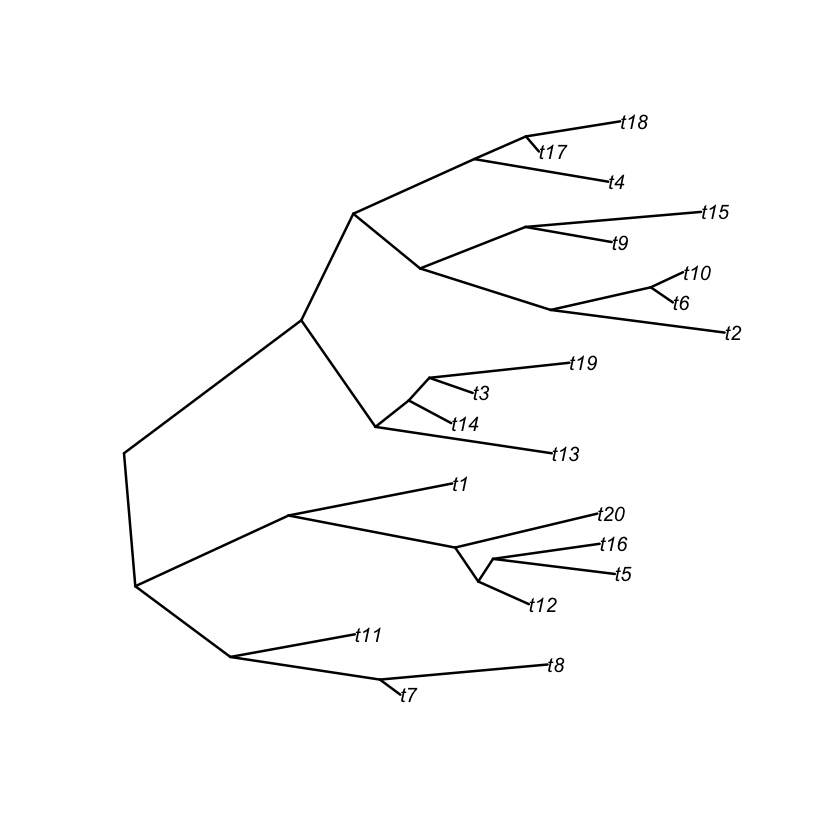

In [16]:
plot(tree, type = 'cladogram', edge.width = 2)

In [20]:
str(tree)

List of 4
 $ edge       : int [1:38, 1:2] 21 22 23 24 24 23 22 25 26 27 ...
 $ tip.label  : chr [1:20] "t7" "t8" "t11" "t12" ...
 $ edge.length: num [1:38] 0.063 0.53 0.834 0.114 0.934 ...
 $ Nnode      : int 19
 - attr(*, "class")= chr "phylo"
 - attr(*, "order")= chr "cladewise"


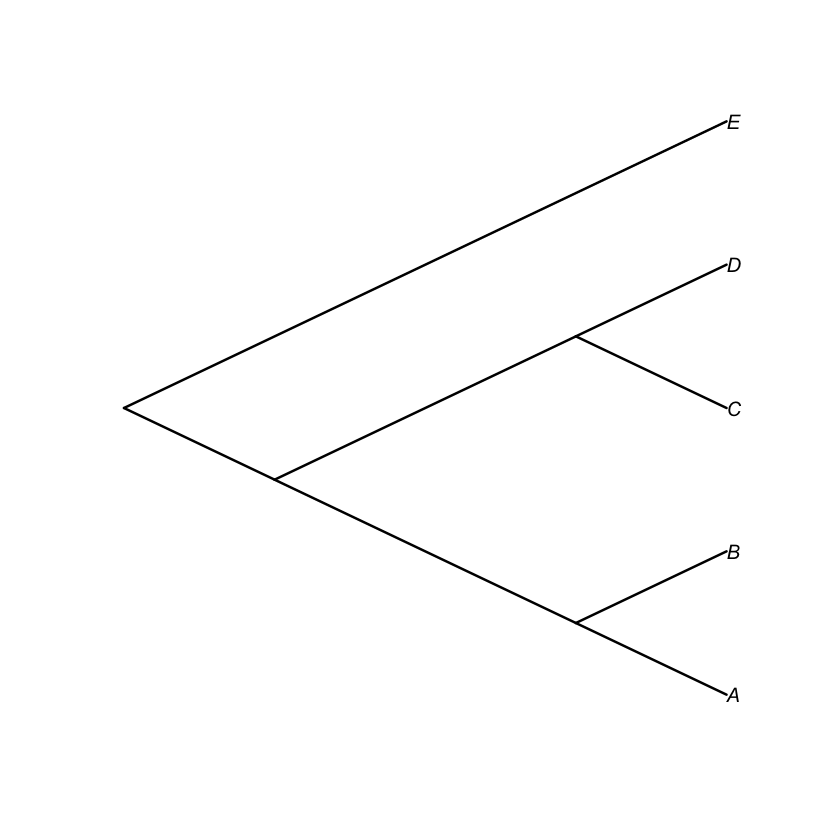

In [21]:
tree <- read.tree(text = "(((A,B),(C,D)),E);")
plot(tree, type = "cladogram", edge.width = 2)

In [22]:
tree


Phylogenetic tree with 5 tips and 4 internal nodes.

Tip labels:
[1] "A" "B" "C" "D" "E"

Rooted; no branch lengths.

In [23]:
str(tree)

List of 3
 $ edge     : int [1:8, 1:2] 6 7 8 8 7 9 9 6 7 8 ...
 $ tip.label: chr [1:5] "A" "B" "C" "D" ...
 $ Nnode    : int 4
 - attr(*, "class")= chr "phylo"
 - attr(*, "order")= chr "cladewise"


In [24]:
tree$edge

6,7
7,8
8,1
8,2
7,9
9,3
9,4
6,5


In [25]:
tree$tip.label

[1] "A" "B" "C" "D" "E"

In [26]:
tree$Nnode

[1] 4

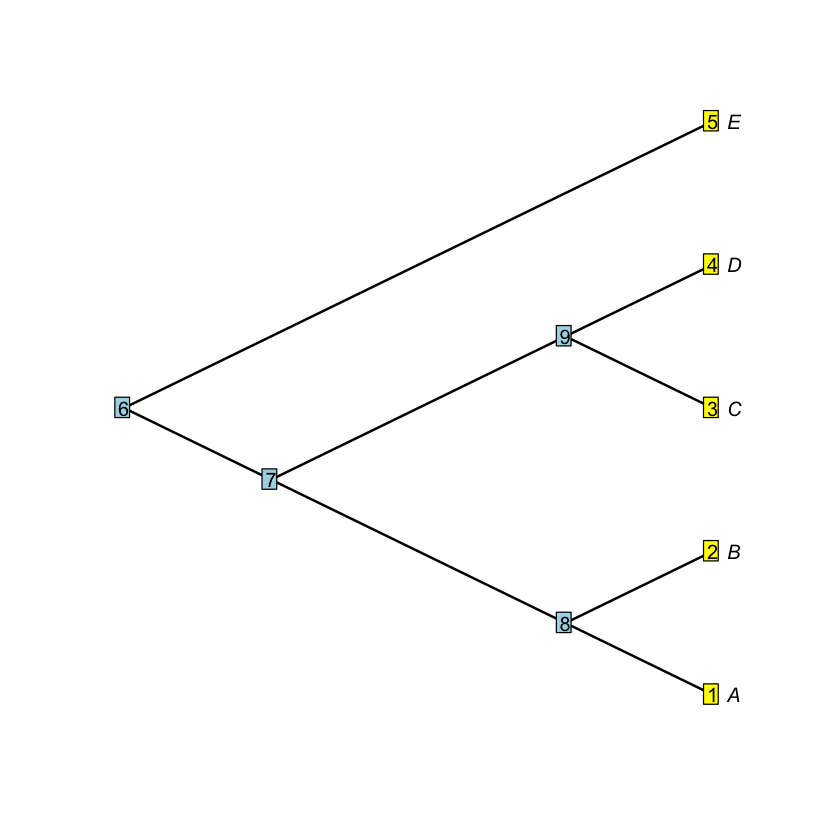

In [30]:
plot(tree, edge.width = 2, label.offset = 0.1, type = "cladogram")
nodelabels()
tiplabels()
# N.B. these must be called here to render labels!

In [34]:
is.binary.tree(tree)

[1] TRUE

In [42]:
library(jsonlite)
# N.B. 'mtcars' is a built-in sample data frame
x <- toJSON(mtcars, pretty=TRUE)
cat(x)

[
  {
    "mpg": 21,
    "cyl": 6,
    "disp": 160,
    "hp": 110,
    "drat": 3.9,
    "wt": 2.62,
    "qsec": 16.46,
    "vs": 0,
    "am": 1,
    "gear": 4,
    "carb": 4,
    "_row": "Mazda RX4"
  },
  {
    "mpg": 21,
    "cyl": 6,
    "disp": 160,
    "hp": 110,
    "drat": 3.9,
    "wt": 2.875,
    "qsec": 17.02,
    "vs": 0,
    "am": 1,
    "gear": 4,
    "carb": 4,
    "_row": "Mazda RX4 Wag"
  },
  {
    "mpg": 22.8,
    "cyl": 4,
    "disp": 108,
    "hp": 93,
    "drat": 3.85,
    "wt": 2.32,
    "qsec": 18.61,
    "vs": 1,
    "am": 1,
    "gear": 4,
    "carb": 1,
    "_row": "Datsun 710"
  },
  {
    "mpg": 21.4,
    "cyl": 6,
    "disp": 258,
    "hp": 110,
    "drat": 3.08,
    "wt": 3.215,
    "qsec": 19.44,
    "vs": 1,
    "am": 0,
    "gear": 3,
    "carb": 1,
    "_row": "Hornet 4 Drive"
  },
  {
    "mpg": 18.7,
    "cyl": 8,
    "disp": 360,
    "hp": 175,
    "drat": 3.15,
    "wt": 3.44,
    "qsec": 17.02,
    "vs": 0,
    "am": 0,
    "gear": 3,
    "carb": 

OK, so let's try a straightforward conversion using the pattern above:

In [53]:
toJSON(tree, pretty=TRUE)

ERROR: Error: No method asJSON S3 class: phylo


**No dice!** If only there was a way to force a liberal interpretation of obscure classes. (SPOILER: There is.)

In [51]:
toJSON(tree, force=TRUE)

{"edge":[[6,7],[7,8],[8,1],[8,2],[7,9],[9,3],[9,4],[6,5]],"tip.label":["A","B","C","D","E"],"Nnode":[4]} 

Is that all there is in `tree` !? It just doesn't seem like enough data. But it's true! See [this explanation]().

In [52]:
str(tree)

List of 3
 $ edge     : int [1:8, 1:2] 6 7 8 8 7 9 9 6 7 8 ...
 $ tip.label: chr [1:5] "A" "B" "C" "D" ...
 $ Nnode    : int 4
 - attr(*, "class")= chr "phylo"
 - attr(*, "order")= chr "cladewise"


If `force` won't do the trick for some reason, [here's an example of how to walk an R object](http://stackoverflow.com/a/24831341) piecemeal and serialize its parts more selectively. 

For more background, here are [the design objectives of the **jsonlite** R package](http://www.r-bloggers.com/new-package-jsonlite-a-smarter-json-encoderdecoder/) and a wonderful "package vignette" that [describes its class-based (de)serialization](https://cran.r-project.org/web/packages/jsonlite/vignettes/json-mapping.pdf) in detail. Here they briefly mention adding methods for new classes:

>  Users in R can extend this system by implementing additional methods for other classes.

It's a bit hazy on how this could be implemented, but the [jsonlite source seems to be on GitHub](https://github.com/jeroenooms/jsonlite). But [this discussion in their issue tracker](https://github.com/jeroenooms/jsonlite/issues/62) tells me that this extensibility was a hoped-for feature they've been unable to deliver. 

Still, it offers an intriguing possibility: **We could write `toJSON`/`fromJSON` for phylo objects, using NexSON as the serialization schema in JSON!** I'm not sure this is a good idea, but it's food for thought.

We can do more piecemeal conversion using [flexible functions like `lapply()`](http://stackoverflow.com/questions/16947643/getting-imported-json-data-into-a-data-frame-in-r) or by borrowing (de)serialization innards from jsonlite like so:

In [69]:
temp.string = jsonlite::serializeJSON(x=list("foo",2))
temp.string

[1] "{\"type\":\"list\",\"attributes\":{},\"value\":[{\"type\":\"character\",\"attributes\":{},\"value\":[\"foo\"]},{\"type\":\"double\",\"attributes\":{},\"value\":[2]}]}"

In [70]:
temp.restored = jsonlite::unserializeJSON(temp.string)
str(temp.restored)

List of 2
 $ : chr "foo"
 $ : num 2


Anyway, we might never use this. Let's move on.

## Importing the Tree Illustrator!

So it turns out "magics" like `%%javascript` are really specific to the IPython **kernel**, and there are no plans to implement them in the R kernel. I struggled with how to inject Javascript in an R notebook, and finally stumbled onto an example of simply echoing the `SCRIPT` tag as a string. Since R is so naive about Javascript, it simply parrots the markup into the cell's output and the script runs!

In [100]:
# To use Javascript in an R notebook, just spell it out and run the cell!
'<SCRIPT TYPE="text/javascript">
    var element = $(IPython.notebook.container).find(".cell.running .output_subarea");
    $.getScript("http://rawgit.com/OpenTreeOfLife/tree-illustrator/master/stylist/ipynb-tree-illustrator.js",
        function() {
            /* This function is called once the IPythonTreeIllustrator module has loaded. 
             * N.B. we mimic the `element` value (a jQuery selection of the output area of
             * this cell) defined by %%javascript magic, which is only available in the 
             * IPython kernel. 
             */
            IPythonTreeIllustrator.initNotebookUI(element);
        }
    );
</SCRIPT>'

[1] "<SCRIPT TYPE=\"text/javascript\">\n    var element = $(IPython.notebook.container).find(\".cell.running .output_subarea\");\n    $.getScript(\"http://rawgit.com/OpenTreeOfLife/tree-illustrator/master/stylist/ipynb-tree-illustrator.js\",\n        function() {\n            /* This function is called once the IPythonTreeIllustrator module has loaded. \n             * N.B. we mimic the `element` value (a jQuery selection of the output area of\n             * this cell) defined by %%javascript magic, which is only available in the \n             * IPython kernel. \n             */\n            IPythonTreeIllustrator.initNotebookUI(element);\n        }\n    );\n</SCRIPT>"

Now we can launch the Tree Illustrator and try (fail) to load R variables. So it's time to add that option to [**ipynb-tree-illustrator.js**](https://github.com/OpenTreeOfLife/tree-illustrator/blob/7c49044b508168ecd9a44ca7525b4841171f4e43/stylist/ipynb-tree-illustrator.js#L631-L644)!